# What is the most optimal skill to learn for Data Analysts?

### Methodology
1. Group skills to determine median salary and likelyhood of being in posting
2. Visualize median salary vs percent skill demand
3. Optional- Determine if certain technologies are more prevalent

In [13]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
import ast
from adjustText import adjust_text


# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [14]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset= 'salary_year_avg')
df_us_exploded = df_da_us.explode('job_skills')

In [15]:
skill_stats = df_us_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
).sort_values(by= 'skill_count', ascending= False)

job_count = len(df_da_us)
skill_stats['skill_percent'] = skill_stats['skill_count'] / job_count * 100

skill_min = 5
df_skills_demanded = skill_stats[skill_stats['skill_percent'] > skill_min]
df_skills_demanded

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


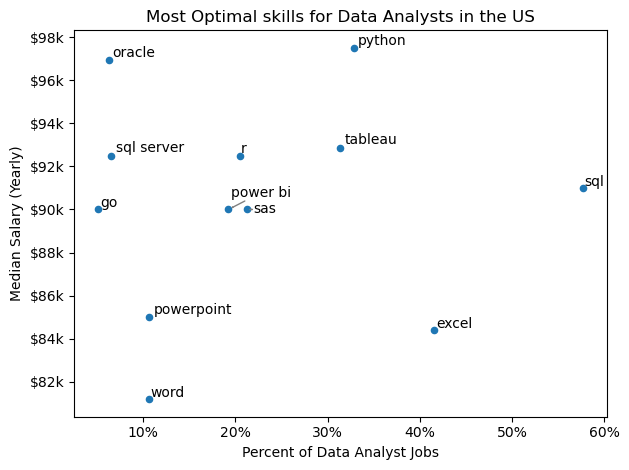

In [26]:
df_skills_demanded.plot(kind= 'scatter', x= 'skill_percent', y= 'median_salary')


texts = []
for i, txt in enumerate(df_skills_demanded.index):
    texts.append(plt.text(df_skills_demanded['skill_percent'].iloc[i], df_skills_demanded['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle= '->', color= 'gray'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}k"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))


plt.title('Most Optimal skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (Yearly)')
plt.tight_layout()
plt.show()


In [27]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'spreadsheet',
  'looker',
  'ms access',
  'tableau',
  'dax',
  'powerbi',
  'sharepoint',
  'nuix',
  'datarobot',
  'power bi',
  'spss',
  'excel',
  'splunk',
  'ssrs',
  'cognos',
  'ssis',
  'sap',
  'esquisse',
  'sas',
  'word',
  'sheets',
  'outlook',
  'qlik',
  'alteryx',
  'visio',
  'msaccess',
  'powerpoint'],
 'programming': ['sql',
  'vb.net',
  'cobol',
  'r',
  'python',
  'golang',
  'kotlin',
  'fortran',
  'no-sql',
  'delphi',
  'sass',
  'visualbasic',
  'visual basic',
  'java',
  'lisp',
  'bash',
  'perl',
  'objective-c',
  'elixir',
  'dart',
  'clojure',
  'crystal',
  'ruby',
  'solidity',
  'nosql',
  'shell',
  'haskell',
  'go',
  'erlang',
  'f#',
  'c++',
  'vba',
  'lua',
  'sas',
  't-sql',
  'pascal',
  'ocaml',
  'julia',
  'groovy',
  'html',
  'powershell',
  'rust',
  'css',
  'c#',
  'matlab',
  'javascript',
  'mongodb',
  'c',
  'php',
  'typescript',
  'apl',
  'scala',
  'mongo',
  'assembly',
  'sw

In [28]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,spreadsheet
0,analyst_tools,looker
0,analyst_tools,ms access
0,analyst_tools,tableau
...,...,...
9,sync,symphony
9,sync,webex
9,sync,slack
9,sync,mattermost


In [30]:
df_plot = df_skills_demanded.merge(df_technology, left_on= 'job_skills', right_on= 'skills')

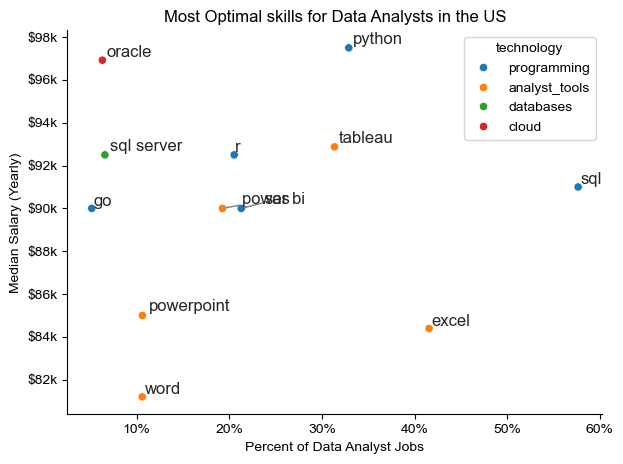

In [ ]:
# df_plot.plot(kind= 'scatter', x= 'skill_percent', y= 'median_salary')
sns.scatterplot(
    data= df_plot,
    x= 'skill_percent',
    y= 'median_salary',
    hue= 'technology'
)
sns.despine()
sns.set_theme(style= 'ticks')


texts = []
for i, txt in enumerate(df_skills_demanded.index):
    texts.append(plt.text(df_skills_demanded['skill_percent'].iloc[i], df_skills_demanded['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle= '->', color= 'gray'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}k"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))


plt.title('Most Optimal skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (Yearly)')
plt.tight_layout()
plt.show()
